# INTERNSHIP - I (ELECTRICITY PRICE PREDICTION)
# Exploratory Data Analysis (EDA)

## Workflow
1) Importing Necessary Packages
2) Data Exploration
3) Data Cleaning
4) Data Visualization
5) Data Wrangling
6) Extraction of Cleaned Dataset for Model Building

## Importing Necessary Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Visualization
import shap
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance

# Data Wrangling
pd.set_option('display.max_columns',50)

## Data Exploration

In [3]:
df = pd.read_csv("C:/Users/Arul Selvaraj/Desktop/dval/energy_dataset.csv")
# Preview of data
df.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
# Describe to show overview of data
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [5]:
# Info to show datatype, nulls, and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
# To check null % amongst columns
round((df.isnull().sum()/len(df)*100),2)

time                                             0.00
generation biomass                               0.05
generation fossil brown coal/lignite             0.05
generation fossil coal-derived gas               0.05
generation fossil gas                            0.05
generation fossil hard coal                      0.05
generation fossil oil                            0.05
generation fossil oil shale                      0.05
generation fossil peat                           0.05
generation geothermal                            0.05
generation hydro pumped storage aggregated     100.00
generation hydro pumped storage consumption      0.05
generation hydro run-of-river and poundage       0.05
generation hydro water reservoir                 0.05
generation marine                                0.05
generation nuclear                               0.05
generation other                                 0.05
generation other renewable                       0.05
generation solar            

In [7]:
# To find correlation
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,NaN,-0.044898,-0.284877,-0.033675,NaN,-0.021279,0.658488,-0.560588,-0.004687,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,NaN,-0.323771,-0.525005,-0.229455,NaN,-0.008440,0.097600,0.104552,0.040447,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,NaN,-0.420646,-0.271527,0.060173,NaN,-0.112904,-0.066279,0.334880,0.074716,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation fossil hard coal,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,NaN,-0.406116,-0.497940,-0.157677,NaN,-0.023930,0.264383,-0.019426,0.046185,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation fossil oil,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,NaN,-0.331011,-0.106753,0.160465,NaN,0.015619,0.375046,-0.115087,0.100211,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage aggregated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Correlation with respect to target variable 
correlations = df.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465641
generation fossil gas                          0.461706
total load actual                              0.436127
total load forecast                            0.435864
generation fossil brown coal/lignite           0.364088
generation fossil oil                          0.284679
generation other renewable                     0.256181
generation waste                               0.169605
generation biomass                             0.142369
forecast solar day ahead                       0.101402
generation other                               0.100048
generation solar                               0.098488
generation hydro water reservoir               0.071549
generation nuclear                            -0.052596
generation hydro run-of-river and poundage    -0.137106
generation wind onshore                       -0

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


## Data Cleaning

In [9]:
# To drop columns with NaN 
zero_val_cols = ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'forecast wind offshore eday ahead',
                 'generation fossil coal-derived gas',
                 'generation hydro pumped storage aggregated']

In [10]:
# To drop columns with zero
heat_map_features = df.drop(columns=zero_val_cols,axis=1)

## Data Visualization

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


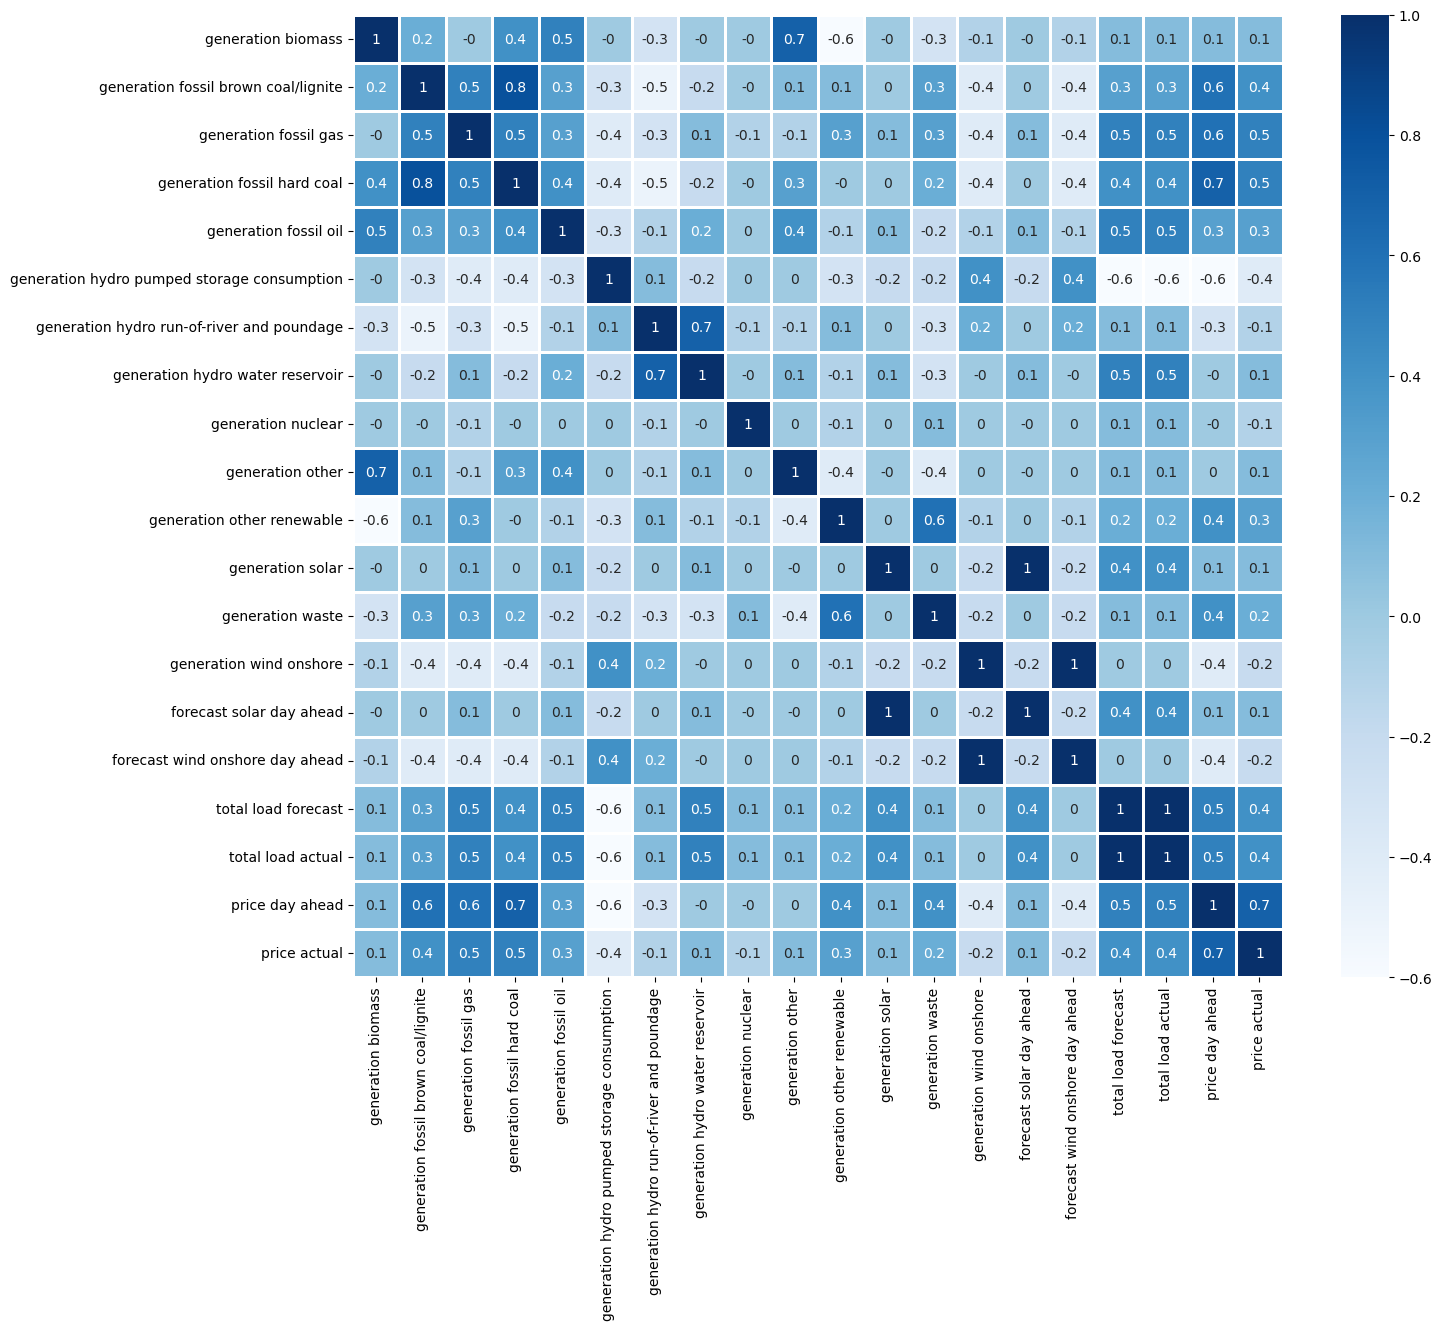

In [13]:
# Heatmap
plt.figure(figsize=(15,12.5))
sns.heatmap(round(heat_map_features.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show()

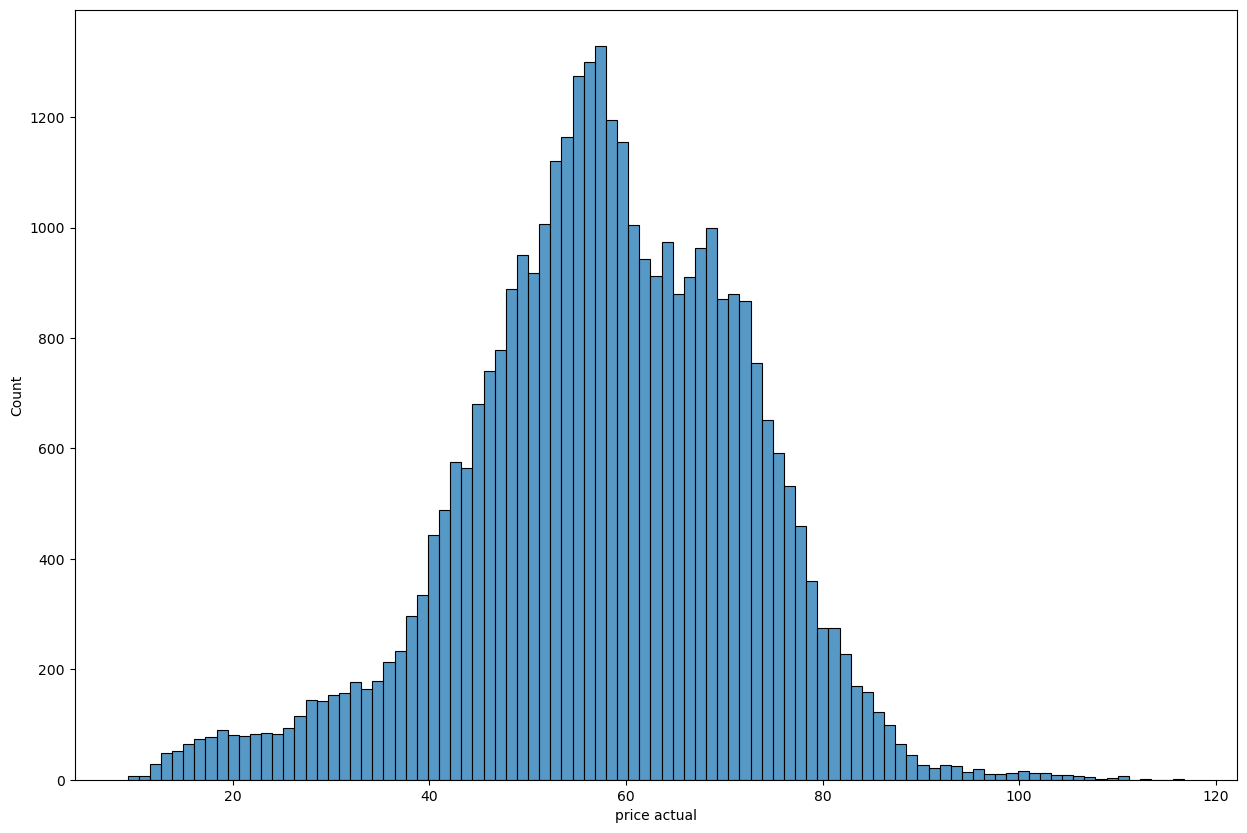

In [14]:
# Histogram
plt.figure(figsize=(15,10))
sns.histplot(df,x='price actual')
plt.show()

## Data Wrangling

In [15]:
# Creating a user-defined function to perform data wrangling
def wrangle(filepath):
    
    # Read in the data, parse dates and set the index
    df = pd.read_csv(filepath, parse_dates=['time'], index_col='time')
 
    # Rename columns by replacing all - or blank space with _
    df.columns = df.columns.str.replace(' ','_').str.replace('-','_')

    # Make the index DT
    df.index = pd.to_datetime(df.index, utc=True)    

    # Drop all columns with data leakage, or 90% + null
    df.drop(columns=['price_day_ahead',
                     'generation_marine',
                     'total_load_forecast',
                     'generation_geothermal',
                     'generation_fossil_peat',
                     'generation_wind_offshore',
                     'forecast_solar_day_ahead',
                     'generation_fossil_oil_shale',
                     'forecast_wind_onshore_day_ahead',
                     'forecast_wind_offshore_eday_ahead',
                     'generation_fossil_coal_derived_gas',
                     'generation_hydro_pumped_storage_aggregated'],inplace=True)
    
    # Drop Outlier row 2014 for plotting
    df = df.drop(pd.Timestamp('2014-12-31 23:00:00+00:00')) 
    
    # Sort index
    df = df.sort_index()
    
    # Set conditional satements for filtering times of month to season value
    condition_winter = (df.index.month>=1)&(df.index.month<=3)
    condtion_spring = (df.index.month>=4)&(df.index.month<=6)
    condition_summer = (df.index.month>=7)&(df.index.month<=9)
    condition_automn = (df.index.month>=10)@(df.index.month<=12)
    
    # Create column in dataframe that inputs the season based on the conditions created above
    df['season'] = np.where(condition_winter,'winter',
                            np.where(condtion_spring,'spring',
                                     np.where(condition_summer,'summer',
                                              np.where(condition_automn,'automn',np.nan))))

    return df

# Applying the wrangle function to the dataset
df=wrangle('C:/Users/Arul Selvaraj/Desktop/dval/energy_dataset.csv')

## Extracting Cleaned Dataset for Model Building

In [16]:
# To get a cleaned dataset
df.to_csv("energy_cleaned_dataset.csv")